# Sample Quality Control

| Patient   | Sample Name   | Origin           | Spot before QC | Spots after QC | % Spots retained post QC |
|-----------|---------------|------------------|----------------|----------------|--------------------------|
| IU_PT1    | IU_PDA_T1     | Pancreas          | 3610           | 3530           | 97.78393352               |
| IU_PT2    | IU_PDA_HM2_2  | Liver             | 963            | 959            | 99.58463136               |
| IU_PT2    | IU_PDA_HM2    | Liver             | 2481           | 2478           | 99.87908102               |
| IU_PT2    | IU_PDA_T2     | Pancreas          | 4121           | 4118           | 99.92720214               |
| IU_PT2    | IU_PDA_NP2    | Normal Pancreas   | 2996           | 2995           | 99.96662216               |
| IU_PT3    | IU_PDA_T3     | Pancreas          | 4409           | 4354           | 98.7525516                |
| IU_PT3    | IU_PDA_HM3    | Liver             | 1185           | 1176           | 99.24050633               |
| IU_PT4    | IU_PDA_T4     | Pancreas          | 3864           | 3621           | 93.71118012               |
| IU_PT4    | IU_PDA_HM4    | Liver             | 1857           | 1841           | 99.13839526               |
| IU_PT5    | IU_PDA_HM5    | Liver             | 3042           | 3038           | 99.86850756               |
| IU_PT6    | IU_PDA_HM6    | Liver             | 3555           | 1666           | 46.86357243               |
| IU_PT6    | IU_PDA_T6     | Pancreas          | 3792           | 3397           | 89.58333333               |
| IU_PT6    | IU_PDA_LNM6   | Lymph node        | 3748           | 3745           | 99.91995731               |
| IU_PT7    | IU_PDA_LNM7   | Lymph node        | 3191           | 3186           | 99.84330931               |
| IU_PT8    | IU_PDA_T8     | Pancreas          | 3891           | 3779           | 97.12156258               |
| IU_PT8    | IU_PDA_LNM8   | Lymph node        | 3435           | 3407           | 99.18486172               |
| IU_PT8    | IU_PDA_HM8    | Liver             | 4044           | 4032           | 99.70326409               |
| IU_PT9    | IU_PDA_HM9    | Liver             | 2365           | 1908           | 80.67653277               |
| IU_PT9    | IU_PDA_T9     | Pancreas          | 3529           | 3526           | 99.91499008               |
| IU_PT10   | IU_PDA_HM10   | Liver             | 2978           | 2348           | 78.84486232               |
| IU_PT10   | IU_PDA_T10    | Pancreas          | 2793           | 2714           | 97.17150018               |
| IU_PT10   | IU_PDA_NP10   | Normal Pancreas   | 3010           | 2966           | 98.53820598               |
| IU_PT10   | IU_PDA_LNM10  | Lymph node        | 4173           | 4147           | 99.37694704               |
| IU_PT11   | IU_PDA_T11    | Pancreas          | 2841           | 2777           | 97.74727209               |
| IU_PT11   | IU_PDA_NP11   | Normal Pancreas   | 3913           | 3859           | 98.61998467               |
| IU_PT11   | IU_PDA_HM11   | Liver             | 3979           | 3931           | 98.79366675               |
| IU_PT12   | IU_PDA_LNM12  | Lymph node        | 3293           | 3213           | 97.57060431               |
| IU_PT12   | IU_PDA_T12    | Pancreas          | 3657           | 3642           | 99.58982773               |
| IU_PT12   | IU_PDA_HM12   | Liver             | 2962           | 2961           | 99.96623903               |
| IU_PT13   | IU_PDA_HM13   | Liver             | 3343           | 2182           | 65.27071493               |
| **Total** |               |                  | **97020**       | **91496**       | **94.30632859**            |


<center><h3>Tina expirment</center>
To analyze Tina's experiment, which investigates molecular changes in the tumor microenvironment (TME) across different treatments and time points in a B16 melanoma mouse model, I recommend a statistical approach that accounts for both fixed and random effects. Specifically, use a linear mixed-effects model with gene expression as the response variable. The fixed effects should include the treatment groups (mock, IL-15, IL-21, IL-15/IL-21 transduced T cells) and time points (Day 4 and Day 8), along with their interaction to assess whether the effect of treatment varies over time. The random effects should account for variability between individual mice by including random intercepts for each mouse, specified as (1 | mouse_id) in the model. This approach adjusts for the hierarchical structure of the data, where observations are nested within mice, and captures individual differences that could influence gene expression levels.

For the high-dimensional gene expression data, use specialized tools like DESeq2 or edgeR that are designed for RNA-seq analysis and can handle the count-based nature of the data. Apply appropriate normalization and multiple testing correction methods to control the false discovery rate. Integrate clinical data such as tumor volume, survival rates, and toxicity levels by performing correlation analyses or incorporating them into the model as covariates to explore their relationship with gene expression patterns.

This statistical strategy allows for robust identification of differentially expressed genes and pathways associated with the treatments while accounting for both the experimental design and biological variability. It provides a framework to uncover molecular insights into how different cytokine treatments affect the TME and correlate with tumor response, aligning with the primary objectives of Tina's research.

<center>Example from Nature Gentics 2024, Khaliq et al

To compare gene expression between two clusters, CC1 and CC3, across primary and secondary tumors, I will refer to the analysis approach described in the paper "Spatial transcriptomic analysis of primary and metastatic pancreatic cancers highlights tumor microenvironmental heterogeneity" (https://doi.org/10.1038/s41588-024-01914-4).

Goal:
The objective is to assess the differential gene expression between the two clusters (CC1 and CC3) in both the primary tumor and the metastatic (secondary) tumor environments. This comparison aims to uncover potential differences in the tumor microenvironment (TME) that contribute to cancer progression or metastasis.

By comparing the gene expression profiles of clusters CC1 and CC3 in primary and secondary tumors, this analysis can provide a detailed understanding of how the tumor microenvironment varies between these clusters and across different stages of cancer.

In [1]:
import cupy as cp
import cupyx
import scanpy as sc
import spatialleiden as sl
import squidpy as sq
import numpy as np
from cupyx.scipy.sparse import csr_matrix
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import random
import pandas as pd
# from rsc_functions.utility.applyqc import applyqc
# from rsc_functions.reports.plot import plot_spatial,plot_spatial_data, plot_dist
# from rsc_functions.utility.rank_genes_groups import return_markers,rank_genes_groups
# from rsc_functions.reports.plot import plot_expression

import anndata as ad
import re
import scanpy as sc
import squidpy as sq
from anndata import AnnData
import scipy.sparse as sp

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap,Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker
import seaborn as sns
import os
import gzip
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde
from scipy.interpolate import griddata

In [2]:
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Pancreatic_Cancer_paper_2024"
files = [file for file in os.listdir(path_016) if ".csv" in file]
# get tissue symble 

In [3]:
# indicator of specfic sample
ids = []
for filename in files:
    match = re.search(r'IU_PDA_([^_]+)_', filename)
    if match:
        ids.append(match.group(1))

ids = list(set(ids))

In [4]:
def get_file(attrib,file_sel,ind):
    file_ind = [file for file in file_sel if 'IU_PDA_' + ind + "_" + attrib in file]
    return file_ind[0]
get_file(attrib = 'xy_coordinates',file_sel = files,ind  = ids[0])   

'IU_PDA_HM3_xy_coordinates.csv'

In [5]:
def agrrData(file_list, indictor):
    def get_file(attrib,file_sel,ind):
        file_ind = [file for file in file_sel if 'IU_PDA_' + ind + "_" + attrib in file]
        return file_ind[0]
    raw_counts_ind =  get_file(attrib = 'raw_counts',file_sel = file_list,ind  = indictor)   
    xy_coordinates_ind = get_file(attrib = 'xy_coordinates',file_sel =file_list,ind  = indictor)
    var_ind = get_file(attrib = 'var',file_sel =file_list,ind  = indictor)
    cell_type_ind = get_file(attrib = 'cell_type',file_sel =file_list,ind  = indictor)
    clusters_ind = get_file(attrib = 'clusters',file_sel =file_list,ind  = indictor)
    # read data
    counts_df = pd.read_csv(os.path.join(path_016,raw_counts_ind),index_col=None)
    counts = counts_df.iloc[:,1:].to_numpy()
    del counts_df
    xy_coordinates = pd.read_csv(os.path.join(path_016,xy_coordinates_ind),index_col=None).iloc[:,1:].to_numpy()
    var = pd.read_csv(os.path.join(path_016,var_ind),index_col=None).iloc[:,1:].rename(columns = {"x":'id'})
    obs = pd.read_csv(os.path.join(path_016,cell_type_ind),index_col=None).iloc[:,1:].rename(columns = {'seurat_subset$first_type':'cell_type'})
    obs['clusters'] = pd.read_csv(os.path.join(path_016,clusters_ind),index_col=None).iloc[:,1:].rename(columns = {'seurat_subset$CompositionCluster_CC':'clusters'})
    andata = AnnData(counts.T,var = var ,obsm={"spatial": xy_coordinates}, obs = obs, uns = {"sample_name":indictor})
    andata.obsm['spatial'] = np.array(andata.obsm['spatial'], dtype=np.float64)
    andata.var = andata.var.set_index('id')
    andata.var.index.name = None
    andata.X = sp.csr_matrix(andata.X)
    return andata

In [ ]:
# first we compose data together 
import warnings
warnings.filterwarnings('ignore')
andata_container = {}
all_features = set()
for id_ in ids:
    try: 
        andta_temp = agrrData(file_list = files,indictor = id_)
    except:
        continue
    all_features.update(set(andta_temp.var_names))
    andata_container[id_] = andta_temp
    del andta_temp


In [ ]:
# Function to align features in each AnnData object
def align_features(andata, all_features):
    # Create a DataFrame with all features, filling missing values with zeros
    full_var_df = pd.DataFrame(index=all_features)
    andata.obs['sample_name'] = andata.uns['sample_name']
    
    # Align the current object's features to the union set of all features
    aligned_counts = pd.DataFrame(andata.X.toarray(), columns=andata.var_names, index=andata.obs_names).reindex(columns=all_features, fill_value=0)
    
    # Update the AnnData object with aligned counts and full var information
    aligned_andata = ad.AnnData(sp.csr_matrix(aligned_counts), 
                                obs=andata.obs, 
                                var=full_var_df.loc[aligned_counts.columns], 
                                obsm=andata.obsm, 
                                uns=andata.uns)
    return aligned_andata

In [ ]:
aligned_andata_list = []
batch_keys = []
for key in andata_container:
    aligned_andata = align_features(andata_container[key], list(all_features))
    aligned_andata_list.append(aligned_andata)
    batch_keys.append(key)  # Use the dictionary keys as batch labels
    
andata_concat = ad.concat(aligned_andata_list, 
                          join='outer', 
                          label='batch', 
                          keys=batch_keys)


In [ ]:
andata_concat

In [ ]:
andata_concat.obs['batch_key'] = andata_concat.obs['sample_name'].str[0]

In [ ]:
sample_name = list(set(andata_concat.obs['sample_name']))

In [14]:
def plot_dist(andata,column,ax,sample_name,type = 'obs', bins = 'auto',title = '',xlab = '',ylab =''):
    '''
    You can replace 'auto' with any other method (e.g., 'fd', 'doane', 'scott', 'rice', 'sturges', or 'sqrt')
    '''
    palette1 = sns.color_palette("colorblind",9)
    andata = andata[andata.obs['sample_name']==sample_name,:]
    sc.pp.calculate_qc_metrics(andata,inplace =True)
    if type == 'obs':
        arr = andata.obs[column].values
    else:
        arr = andata.var[column].values
    bin_edges = np.histogram_bin_edges(arr, bins='auto')
    # Calculate bin edges using NumPy's 'auto' method
    # Calculate bin width
    bin_width = bin_edges[1] - bin_edges[0]
    sns.histplot(arr, binwidth=bin_width,color = 'black',palette=palette1,ax = ax, kde=True, line_kws={"color": "black"})
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title)

In [12]:
sample_name_sel = [sn for sn in sample_name if "T" in sn]
sample_name_sel

['T3', 'T1', 'T9', 'T4', 'T10', 'T6', 'T8', 'T11', 'T2', 'T12']

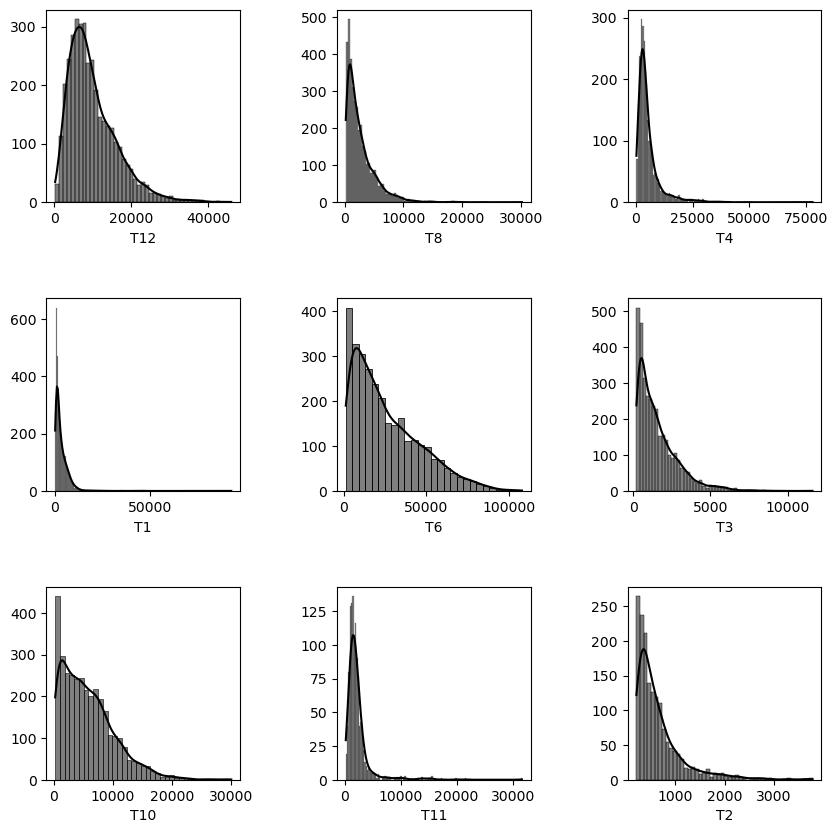

In [54]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.ravel()
plot_dist(andata_concat,column = 'total_counts',ax = ax[0],sample_name = sample_name[0],xlab = sample_name_sel[0])
plot_dist(andata_concat,column = 'total_counts',ax = ax[1],sample_name = sample_name[1],xlab = sample_name_sel[1])
plot_dist(andata_concat,column = 'total_counts',ax = ax[2],sample_name = sample_name[2],xlab = sample_name_sel[2])
plot_dist(andata_concat,column = 'total_counts',ax = ax[3],sample_name = sample_name[3],xlab = sample_name_sel[3])
plot_dist(andata_concat,column = 'total_counts',ax = ax[4],sample_name = sample_name[4],xlab = sample_name_sel[4])
plot_dist(andata_concat,column = 'total_counts',ax = ax[5],sample_name = sample_name[5],xlab = sample_name_sel[5])
plot_dist(andata_concat,column = 'total_counts',ax = ax[6],sample_name = sample_name[6],xlab = sample_name_sel[6])
plot_dist(andata_concat,column = 'total_counts',ax = ax[7],sample_name = sample_name[7],xlab = sample_name_sel[7])
plot_dist(andata_concat,column = 'total_counts',ax = ax[8],sample_name = sample_name[8],xlab = sample_name_sel[8])
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

In [56]:
sample_name_sel = [sn for sn in sample_name if "HM" in sn]
sample_name_sel,len(sample_name_sel)

(['HM3',
  'HM6',
  'HM9',
  'HM8',
  'HM4',
  'HM11',
  'HM5',
  'HM2',
  'HM13',
  'HM12',
  'HM10'],
 11)

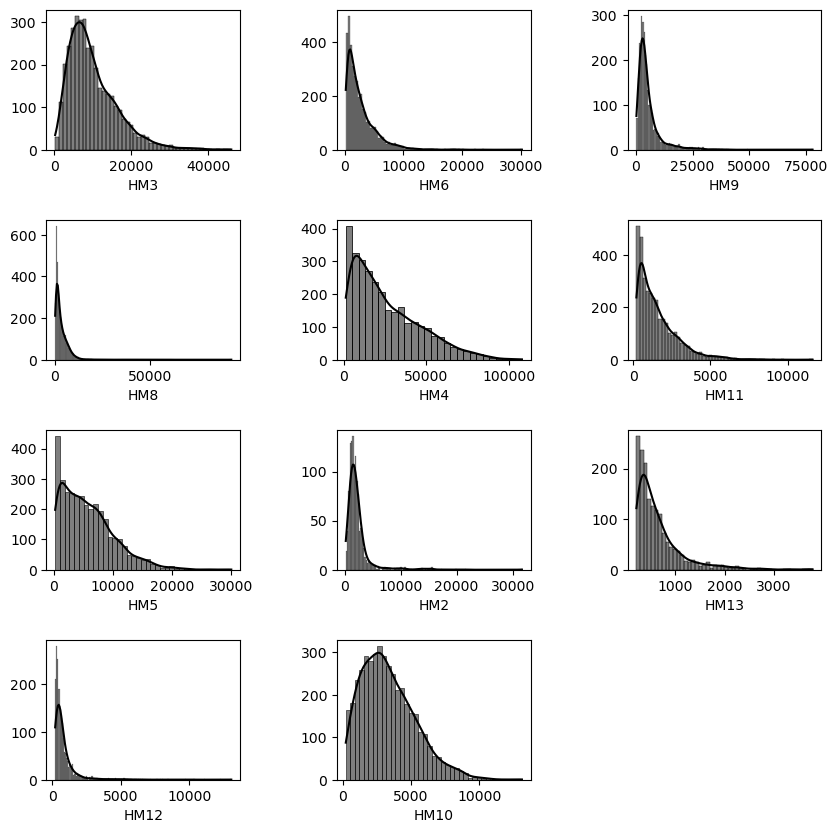

In [58]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
ax = ax.ravel()
plot_dist(andata_concat,column = 'total_counts',ax = ax[0],sample_name = sample_name[0],xlab = sample_name_sel[0])
plot_dist(andata_concat,column = 'total_counts',ax = ax[1],sample_name = sample_name[1],xlab = sample_name_sel[1])
plot_dist(andata_concat,column = 'total_counts',ax = ax[2],sample_name = sample_name[2],xlab = sample_name_sel[2])
plot_dist(andata_concat,column = 'total_counts',ax = ax[3],sample_name = sample_name[3],xlab = sample_name_sel[3])
plot_dist(andata_concat,column = 'total_counts',ax = ax[4],sample_name = sample_name[4],xlab = sample_name_sel[4])
plot_dist(andata_concat,column = 'total_counts',ax = ax[5],sample_name = sample_name[5],xlab = sample_name_sel[5])
plot_dist(andata_concat,column = 'total_counts',ax = ax[6],sample_name = sample_name[6],xlab = sample_name_sel[6])
plot_dist(andata_concat,column = 'total_counts',ax = ax[7],sample_name = sample_name[7],xlab = sample_name_sel[7])
plot_dist(andata_concat,column = 'total_counts',ax = ax[8],sample_name = sample_name[8],xlab = sample_name_sel[8])
plot_dist(andata_concat,column = 'total_counts',ax = ax[9],sample_name = sample_name[9],xlab = sample_name_sel[9])
plot_dist(andata_concat,column = 'total_counts',ax = ax[10],sample_name = sample_name[10],xlab = sample_name_sel[10])
ax[11].axis('off')

plt.subplots_adjust(wspace = 0.5, hspace=0.5)

In [12]:
sample_name_sel = [sn for sn in sample_name if "L" in sn]
sample_name_sel

['LNM12', 'LNM8', 'LNM7', 'LNM6', 'LNM10']

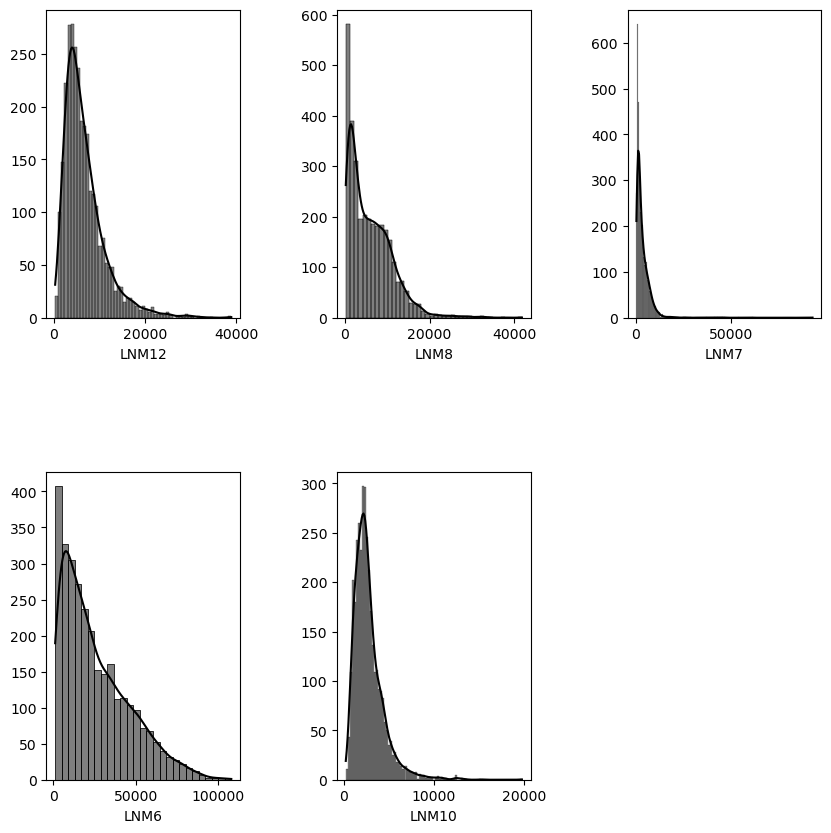

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
ax = ax.ravel()
plot_dist(andata_concat,column = 'total_counts',ax = ax[0],sample_name = sample_name[0],xlab = sample_name_sel[0])
plot_dist(andata_concat,column = 'total_counts',ax = ax[1],sample_name = sample_name[1],xlab = sample_name_sel[1])
plot_dist(andata_concat,column = 'total_counts',ax = ax[2],sample_name = sample_name[2],xlab = sample_name_sel[2])
plot_dist(andata_concat,column = 'total_counts',ax = ax[3],sample_name = sample_name[3],xlab = sample_name_sel[3])
plot_dist(andata_concat,column = 'total_counts',ax = ax[4],sample_name = sample_name[4],xlab = sample_name_sel[4])
ax[5].axis('off')
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

In [18]:
sample_name_sel = [sn for sn in sample_name if "NP" in sn]
sample_name_sel

['NP2', 'NP10', 'NP11']

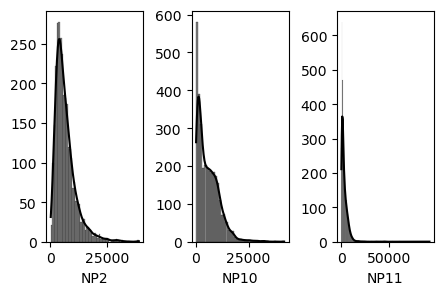

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(5, 3))
ax = ax.ravel()
plot_dist(andata_concat,column = 'total_counts',ax = ax[0],sample_name = sample_name[0],xlab = sample_name_sel[0])
plot_dist(andata_concat,column = 'total_counts',ax = ax[1],sample_name = sample_name[1],xlab = sample_name_sel[1])
plot_dist(andata_concat,column = 'total_counts',ax = ax[2],sample_name = sample_name[2],xlab = sample_name_sel[2])
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

In [24]:
hm_filterCell = {'HM10':10_000, 'HM12':500, 'HM13':2000, 'HM2':5000,'HM5':20_000, 'HM8':10_000, 'HM4':10_000, 'HM11':5_000, 'HM3':25_000, 'HM6':10_000,'HM9':20_000}
t_filterCell ={'T12':30_000, 'T8':10_000, 'T4':20_000, 'T1':5000,'T6':10_000, 'T3':6_000, 'T10':20_000, 'T11':10_000, 'T2':2_000}
l_filterCell ={'LNM6':75_000, 'LNM10':7_000, 'LNM12':20_000, 'LNM8':20_000,'LNM7':5_000}
NP_filterCell ={'NP2':20_000, 'NP10':20_000, 'NP11':3_000}

In [25]:
merged_dict = hm_filterCell | t_filterCell | l_filterCell | NP_filterCell # merge two dictionaries

Removing cells and log-normalisation. 
First cells will be removed and log-normalisation will be preform. 

In [26]:
andata_concat.obs['total_sum'] = np.asarray(andata_concat.X.sum(axis = 1)).ravel()
andata_concat

AnnData object with n_obs × n_vars = 90537 × 17893
    obs: 'cell_type', 'clusters', 'sample_name', 'batch', 'batch_key', 'total_sum'
    obsm: 'spatial'

In [27]:
andata_concat_log = andata_concat.copy()
andata_concat_log.X = andata_concat_log.X.astype(np.float64)
sc.pp.calculate_qc_metrics(andata_concat_log,inplace =True)

In [28]:
andata_concat_log.obs.reset_index(drop=True, inplace=True)
andata_concat_log.obs_names = andata_concat_log.obs.index.astype(int).astype(str)

In [29]:
keep_ind_contianer = []
for key in merged_dict.keys():
    subset_adata = andata_concat_log[andata_concat_log.obs['sample_name'] == key, :].copy()
    keep_ind = subset_adata.obs.loc[subset_adata.obs['total_counts'] < merged_dict[key],:].index.to_numpy()
    subset_adata = subset_adata[keep_ind,:]
    # Step 3: filter Normalize the total counts for this subset
    #subset_adata = subset_adata[np.where(np.asarray(subset_adata.X.sum(axis = 1)).ravel() < 10_000)[0],:]
    sc.pp.normalize_total(subset_adata)
    # Step 4: Log-transform the normalized data
    sc.pp.log1p(subset_adata)
    keep_ind = keep_ind.astype(int)
    andata_concat_log.X[keep_ind, :] = subset_adata.X
    keep_ind_contianer = keep_ind_contianer + keep_ind.tolist() 
    del subset_adata 
    del keep_ind
andata_concat_log.obs['log_total_sum'] = np.asarray(andata_concat_log.X.sum(axis = 1)).ravel()

In [34]:
andata_concat_log

AnnData object with n_obs × n_vars = 90537 × 17893
    obs: 'cell_type', 'clusters', 'sample_name', 'batch', 'batch_key', 'total_sum', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_total_sum'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

In [35]:
# keep andata high qulity cells
andata_concat_log_filter = andata_concat_log[keep_ind_contianer,:].copy()

In [36]:
andata_concat_log_filter

AnnData object with n_obs × n_vars = 68841 × 17893
    obs: 'cell_type', 'clusters', 'sample_name', 'batch', 'batch_key', 'total_sum', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_total_sum'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

In [37]:
def plot_dist(andata, column, ax, sample_name, type='obs',color = 'black', bins='auto', title='', xlab='', ylab=''):
    '''
    You can replace 'auto' with any other method (e.g., 'fd', 'doane', 'scott', 'rice', 'sturges', or 'sqrt')
    '''
    palette1 = sns.color_palette("colorblind", 9)
    andata = andata[andata.obs['sample_name'] == sample_name, :]
    sc.pp.calculate_qc_metrics(andata, inplace=True)
    
    if type == 'obs':
        arr = andata.obs[column].values
    else:
        arr = andata.var[column].values
    arr = arr[~np.isnan(arr) & ~np.isinf(arr)]
    bin_edges = np.histogram_bin_edges(arr, bins=bins)
    bin_width = bin_edges[1] - bin_edges[0]

    # Plot only the KDE (smooth line) and set line transparency with line_kws
    sns.histplot(arr, binwidth=bin_width,element="poly",color = color,  kde=False, ax=ax, stat='count',  fill=False)

    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title)


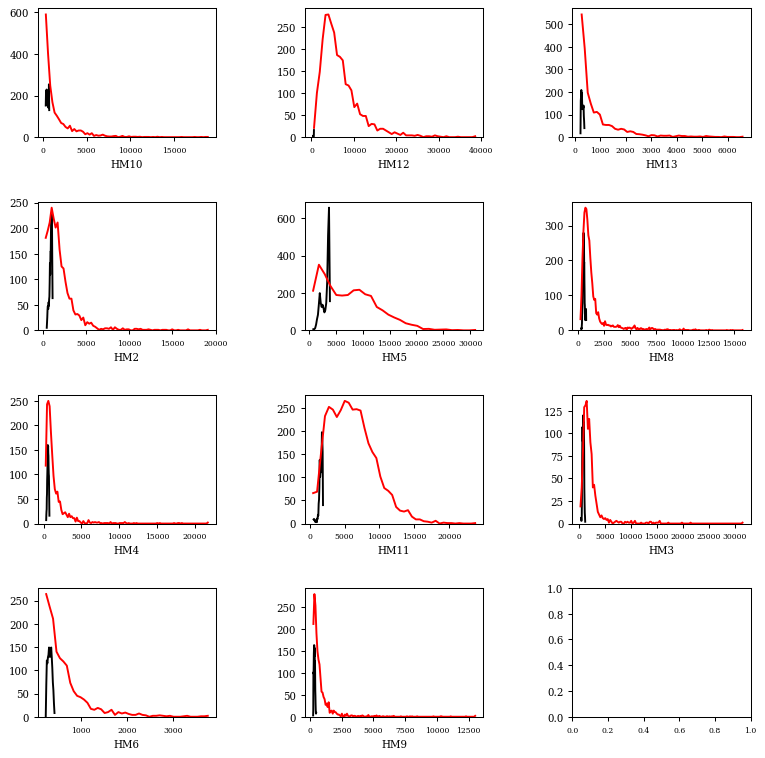

In [162]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
ax = ax.ravel()
for i,hm in enumerate(hm_filterCell.keys()):
    plot_dist(andata_concat_log_filter,column = 'log_total_sum',color = 'black',ax = ax[i],sample_name = hm, xlab = '')
    plot_dist(andata_concat,column = 'total_sum',color = 'red',ax = ax[i],sample_name = hm, xlab = hm)
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

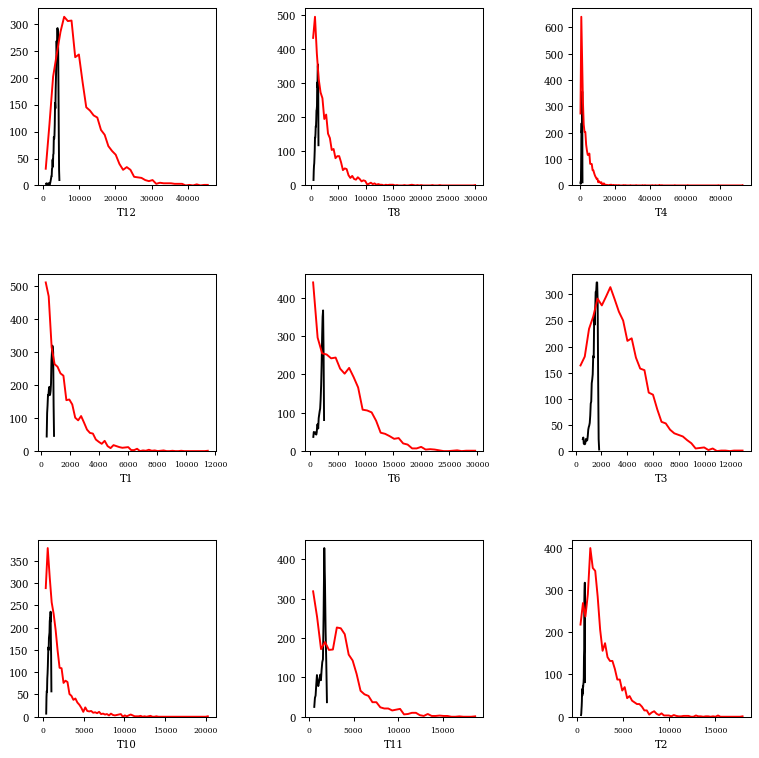

In [163]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.ravel()
for i,hm in enumerate(t_filterCell.keys()):
    plot_dist(andata_concat_log_filter,column = 'log_total_sum',color = 'black',ax = ax[i],sample_name = hm, xlab = '')
    plot_dist(andata_concat,column = 'total_sum',color = 'red',ax = ax[i],sample_name = hm, xlab = hm)
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

In [39]:
andata_concat_log_filter,andata_concat

(AnnData object with n_obs × n_vars = 68841 × 17893
     obs: 'cell_type', 'clusters', 'sample_name', 'batch', 'batch_key', 'total_sum', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_total_sum'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 90537 × 17893
     obs: 'cell_type', 'clusters', 'sample_name', 'batch', 'batch_key', 'total_sum'
     obsm: 'spatial')

In [38]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap,Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker

In [40]:
def plot_spatial_data(andata, column, ax,fig, size = 2, set_xlabel_cbar = '', **kwargs):
    df = pd.DataFrame({
        str(column): andata.obs[column],
        'x': andata.obsm['spatial'][:, 0],
        'y': andata.obsm['spatial'][:, 1],
        'total_counts': andata.obs[column]
    })
    
    
    palette = sns.color_palette("Reds", as_cmap=True)
    listed_cmap = ListedColormap(palette(np.linspace(0, 1, 256)))
    
    norm = Normalize(vmin=df[column].min(), vmax=df[column].max())
    sc = ax.scatter(x=df['x'], y=df['y'], c=df[column], cmap=listed_cmap, norm=norm, s=size, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=listed_cmap), ax=ax)
    cbar.ax.set_xlabel(set_xlabel_cbar, labelpad=10)
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.xaxis.label.set_size(10)  # Reduce label font size
    cbar.ax.tick_params(labelsize=8) 
    
    return sc

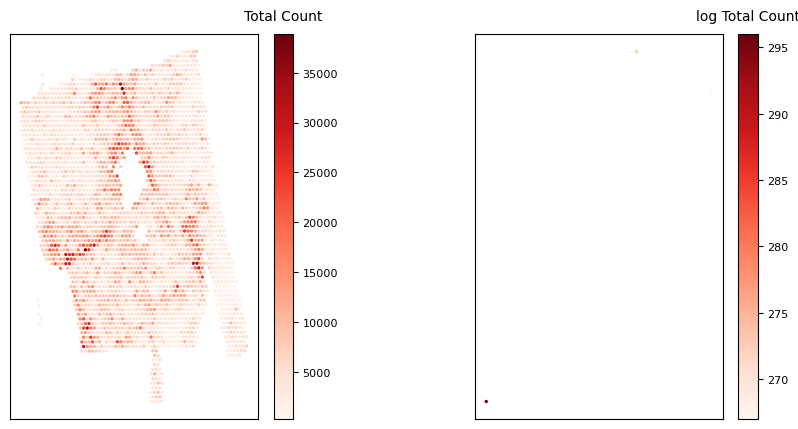

In [42]:
warnings.resetwarnings()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.ravel()
plot_spatial_data(andata_concat[andata_concat.obs['sample_name'] == 'HM12', :].copy(), 'total_sum', fig = fig , ax = ax[0],set_xlabel_cbar = 'Total Count',size = 2)
plot_spatial_data(andata_concat_log_filter[andata_concat_log_filter.obs['sample_name'] == 'HM12', :].copy(), 'total_sum', fig = fig, ax = ax[1],set_xlabel_cbar = 'log Total Count',size = 2)
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

In [43]:
andata_concat.obs

,cell_type,clusters,sample_name,batch,batch_key,total_sum
0,Tumor Epithelial cells,CC12,HM12,HM12,H,22503
1,Tumor Epithelial cells,CC12,HM12,HM12,H,2933
2,Normal Epithelial cells,CC12,HM12,HM12,H,6391
3,Tumor Epithelial cells,CC12,HM12,HM12,H,1710
4,Normal Epithelial cells,CC12,HM12,HM12,H,5890
...,...,...,...,...,...,...
1903,myCAF,CC10,HM9,HM9,H,881
1904,iCAF,CC9,HM9,HM9,H,874
1905,C1Q-TAM,CC10,HM9,HM9,H,376
1906,myCAF,CC4,HM9,HM9,H,453


In [114]:
un_sample

array(['HM10', 'HM11', 'HM12', 'HM13', 'HM2', 'HM3', 'HM4', 'HM5', 'HM6',
       'HM8', 'HM9', 'LNM10', 'LNM12', 'LNM6', 'LNM7', 'LNM8', 'NP10',
       'NP11', 'NP2', 'T1', 'T10', 'T11', 'T12', 'T2', 'T3', 'T4', 'T6',
       'T8', 'T9'], dtype=object)

/tmp/ipykernel_3690439/3453699271.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=df, x=df['sample_name'], y=df['total_sum'],order=order, hue=df['batch_key'],fill=False,palette = sns.color_palette())


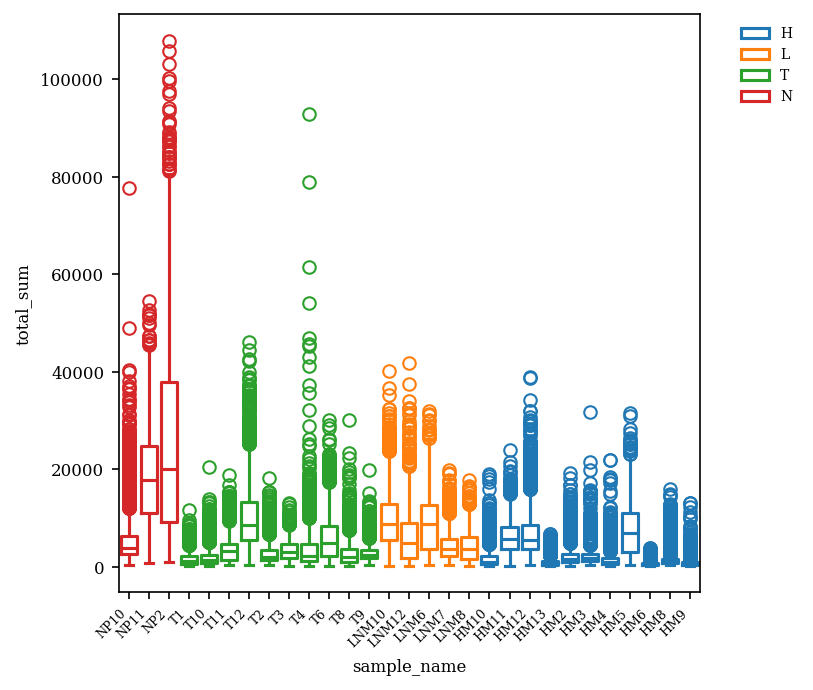

In [45]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 8
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = andata_concat.obs
df['batch_key'] = df['sample_name'].str[0]
un_sample = np.unique(df['sample_name'].values)
order = sorted(un_sample, key=lambda x: ('N', 'T', 'L', 'H').index(x[0]))
sns.boxplot(data=df, x=df['sample_name'], y=df['total_sum'],order=order, hue=df['batch_key'],fill=False,palette = sns.color_palette())
legend = ax.legend( title="",
                        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
                        loc='upper left',
                        fontsize='small',  # Control the font size
                        title_fontsize='medium',
                         # Increase the size of the legend markers
                        frameon=False# Control the title font size
                        )
plt.xticks(rotation=45, ha='right')
plt.show()

In [170]:
andata_concat_log_filter.obs

,cell_type,clusters,sample_name,batch,total_sum,batch_key,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,log_total_sum
15427,myCAF,CC8,HM10,HM10,2555,H,1760,7.473637,2555.0,7.846199,15.185910,21.722114,30.684932,50.684932,665.097555
15428,Hepatocytes,CC1,HM10,HM10,552,H,405,6.006353,552.0,6.315358,35.326087,44.746377,62.862319,100.000000,427.021181
15429,Hepatocytes,CC1,HM10,HM10,735,H,464,6.142037,735.0,6.601230,39.727891,50.476190,64.081633,100.000000,423.033251
15430,Hepatocytes,CC3,HM10,HM10,1266,H,1000,6.908755,1266.0,7.144407,17.930490,25.829384,36.808847,60.505529,598.856296
15431,Hepatocytes,CC1,HM10,HM10,1375,H,856,6.753438,1375.0,7.226936,33.818182,41.745455,52.290909,74.109091,514.752523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82019,myCAF,CC14,T2,T2,1406,T,1086,6.991177,1406.0,7.249215,17.638691,25.248933,36.984353,58.321479,800.919569
82021,myCAF,CC14,T2,T2,783,T,647,6.473891,783.0,6.664409,20.306513,30.140485,42.911877,81.226054,679.733635
82022,myCAF,CC8,T2,T2,314,T,273,5.613128,314.0,5.752573,28.980892,44.904459,76.751592,100.000000,462.858135
82023,Tumor Epithelial cells,CC14,T2,T2,1268,T,993,6.901737,1268.0,7.145984,18.611987,26.498423,37.460568,61.119874,779.310676


In [172]:
andata_concat_log_filter.obs

,cell_type,clusters,sample_name,batch,total_sum,batch_key,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,log_total_sum
15427,myCAF,CC8,HM10,HM10,2555,H,1760,7.473637,2555.0,7.846199,15.185910,21.722114,30.684932,50.684932,665.097555
15428,Hepatocytes,CC1,HM10,HM10,552,H,405,6.006353,552.0,6.315358,35.326087,44.746377,62.862319,100.000000,427.021181
15429,Hepatocytes,CC1,HM10,HM10,735,H,464,6.142037,735.0,6.601230,39.727891,50.476190,64.081633,100.000000,423.033251
15430,Hepatocytes,CC3,HM10,HM10,1266,H,1000,6.908755,1266.0,7.144407,17.930490,25.829384,36.808847,60.505529,598.856296
15431,Hepatocytes,CC1,HM10,HM10,1375,H,856,6.753438,1375.0,7.226936,33.818182,41.745455,52.290909,74.109091,514.752523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82019,myCAF,CC14,T2,T2,1406,T,1086,6.991177,1406.0,7.249215,17.638691,25.248933,36.984353,58.321479,800.919569
82021,myCAF,CC14,T2,T2,783,T,647,6.473891,783.0,6.664409,20.306513,30.140485,42.911877,81.226054,679.733635
82022,myCAF,CC8,T2,T2,314,T,273,5.613128,314.0,5.752573,28.980892,44.904459,76.751592,100.000000,462.858135
82023,Tumor Epithelial cells,CC14,T2,T2,1268,T,993,6.901737,1268.0,7.145984,18.611987,26.498423,37.460568,61.119874,779.310676


/tmp/ipykernel_3690439/2980154962.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=df, x=df['sample_name'], y=df['total_sum'],order=order, hue=df['batch_key'],fill=False,palette = sns.color_palette())


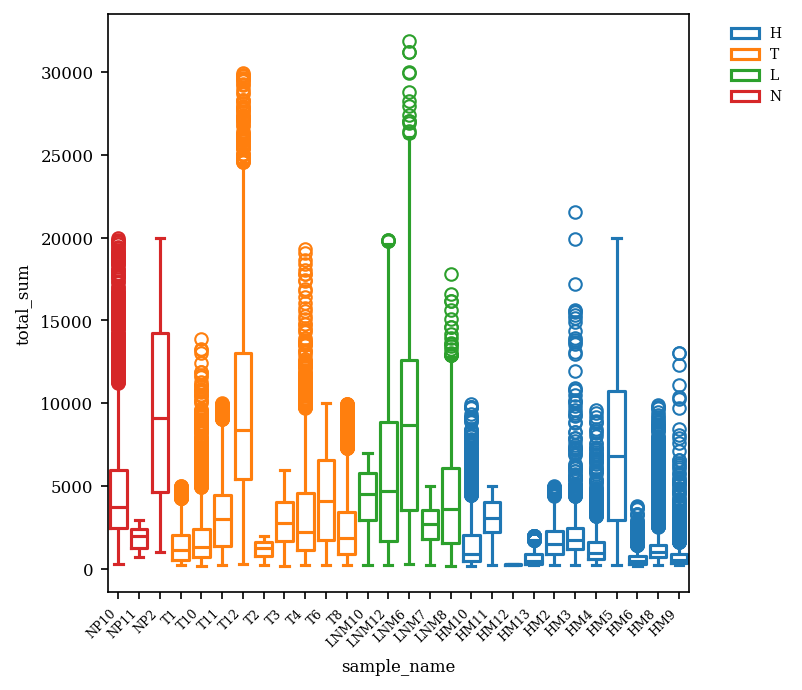

In [46]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 8
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = andata_concat_log_filter.obs
df['batch_key'] = df['sample_name'].str[0]
un_sample = np.unique(df['sample_name'].values)
order = sorted(un_sample, key=lambda x: ('N', 'T', 'L', 'H').index(x[0]))
sns.boxplot(data=df, x=df['sample_name'], y=df['total_sum'],order=order, hue=df['batch_key'],fill=False,palette = sns.color_palette())
legend = ax.legend( title="",
                        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
                        loc='upper left',
                        fontsize='small',  # Control the font size
                        title_fontsize='medium',
                         # Increase the size of the legend markers
                        frameon=False# Control the title font size
                        )
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
df

,cell_type,clusters,sample_name,batch,batch_key,total_sum,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,log_total_sum
36481,myCAF,CC8,HM10,HM10,H,2555,1760,7.473637,2555.0,7.846199,15.185910,21.722114,30.684932,50.684932,665.097555
36482,Hepatocytes,CC1,HM10,HM10,H,552,405,6.006353,552.0,6.315358,35.326087,44.746377,62.862319,100.000000,427.021181
36483,Hepatocytes,CC1,HM10,HM10,H,735,464,6.142037,735.0,6.601230,39.727891,50.476190,64.081633,100.000000,423.033251
36484,Hepatocytes,CC3,HM10,HM10,H,1266,1000,6.908755,1266.0,7.144407,17.930490,25.829384,36.808847,60.505529,598.856296
36485,Hepatocytes,CC1,HM10,HM10,H,1375,856,6.753438,1375.0,7.226936,33.818182,41.745455,52.290909,74.109091,514.752523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88568,Normal Epithelial cells,CC2,NP11,NP11,N,867,266,5.587249,867.0,6.766192,75.086505,80.853518,92.387543,100.000000,374.234160
88592,Normal Epithelial cells,CC2,NP11,NP11,N,2728,1151,7.049255,2728.0,7.911691,54.215543,58.687683,65.139296,76.136364,765.047485
88593,Normal Epithelial cells,CC2,NP11,NP11,N,2600,768,6.645091,2600.0,7.863651,70.346154,74.192308,78.153846,89.692308,540.074653
88600,Normal Epithelial cells,CC2,NP11,NP11,N,1604,517,6.249975,1604.0,7.380879,70.199501,74.002494,80.236908,98.940150,499.719481


/tmp/ipykernel_3690439/937055179.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=df, x=df['sample_name'], y=df['log_total_sum'],order=order, hue=df['batch_key'],fill=False,palette = sns.color_palette())


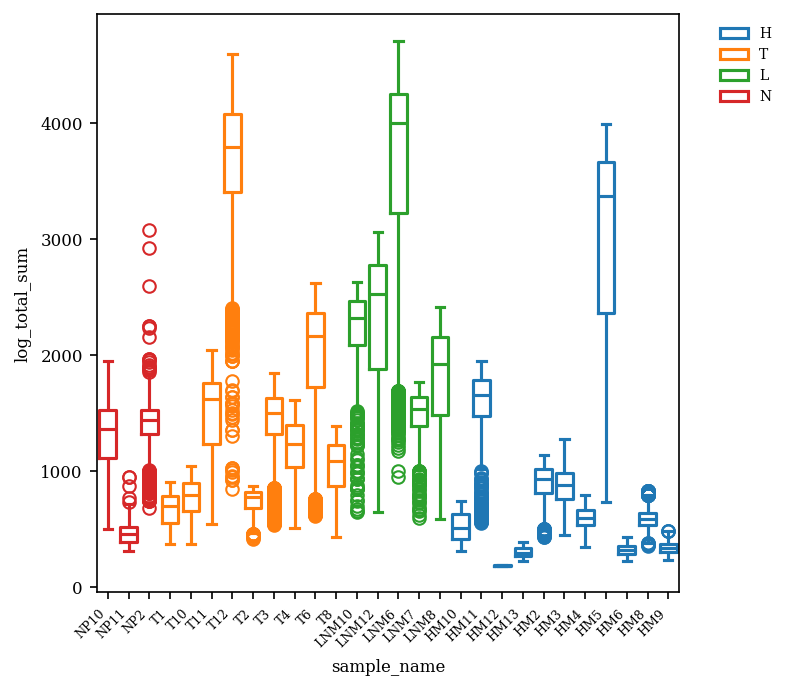

In [48]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 8
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = andata_concat_log_filter.obs
df['batch_key'] = df['sample_name'].str[0]
un_sample = np.unique(df['sample_name'].values)
order = sorted(un_sample, key=lambda x: ('N', 'T', 'L', 'H').index(x[0]))
sns.boxplot(data=df, x=df['sample_name'], y=df['log_total_sum'],order=order, hue=df['batch_key'],fill=False,palette = sns.color_palette())
legend = ax.legend( title="",
                        bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
                        loc='upper left',
                        fontsize='small',  # Control the font size
                        title_fontsize='medium',
                         # Increase the size of the legend markers
                        frameon=False# Control the title font size
                        )
plt.xticks(rotation=45, ha='right')
plt.show()